#** Flight Price Prediction**








##  **Problem Statement**



* Flight prices can vary widely, making it hard for travelers to budget for trips.
* The project aims to develop a machine learning model to predict flight prices.
* The model will use factors like departure/arrival cities, travel dates, and airlines to predict prices.
* The goal is to build a model that accurately predicts flight prices to help travelers save time and money.




##**About Dataset**

Link to Dataset : https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. 

We will use Regression techniques here, since the predicted output will be a continuous value.


##**Features**

 Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

##**Code:**

##1. Importing the required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

##2. Loading the dataset



In [4]:
train_data = pd.read_excel(r"C:\Users\TARUN REDDY\OneDrive\Desktop\IM learning\Capstone project\Capstone 2\Data_Train.xlsx")

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


I saw that route, and total_stops have one missing value, I will check and confirm this information later in the code.

In [7]:
test_data = pd.read_excel(r"C:\Users\TARUN REDDY\OneDrive\Desktop\IM learning\Capstone project\Capstone 2\Test_set.xlsx")

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


##3. EDA

This included understanding the number of rows and columns of train and test data, the type of data in each column, the identification of missing values if any, finding out the value distribution of columns, and finally understanding variation of price with individual columns using visualization.

###1.Train Datset

####1. Checking  null values

In [10]:
#Check for null values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

The route and target column has 1 row where there are missing values. Checking which row it is.

In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


The same row has misssing values in both . Will this missing value once feature engineering is completed.

####2. Droping Duplicate rows

In [13]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = train_data[train_data.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRows.shape

Total Duplicate Rows except first occurrence based on all columns are :


(220, 11)

In [14]:
#remove duplicate rows in training dataset, kept the first occurence
train_data.drop_duplicates(keep='first',inplace=True)

####3. Feature Engineering

###### 1. Date_of_Journey column

Since the Data contains columns of type datetime we need to convert them to timestamp inorder to use them in our analysis.

In [15]:
train_data["Date"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [16]:
train_data["Month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
train_data["Year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  Date             10463 non-null  int64 
 12  Month            10463 non-null  int64 
 13  Year             10463 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [20]:
# AS we have converted Date_of_Journey column into integer date, month, year, so now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

######2.Departure Time

 Similar to Date_of_Journey we can extract values of hour and minute from Dep_Time

In [21]:
#Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

#  Minutes
train_data["Dep_minutes"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# We can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


######3. Arrival Time

Similar to departure time, we can extract values from arrival time 

In [23]:
#Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Minutes
train_data["Arrival_minutes"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Droping Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


######4.Duration

In [25]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [27]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


####4. Handling Categorical Data and Categorical Data Visualizations


1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> will be used in the end in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [30]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10463, dtype: object

In [31]:
# most buiest routes
busy_routes = train_data['Route'].value_counts().reset_index().set_index('index')
busy_routes = busy_routes.head()
busy_routes

,Route
index,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


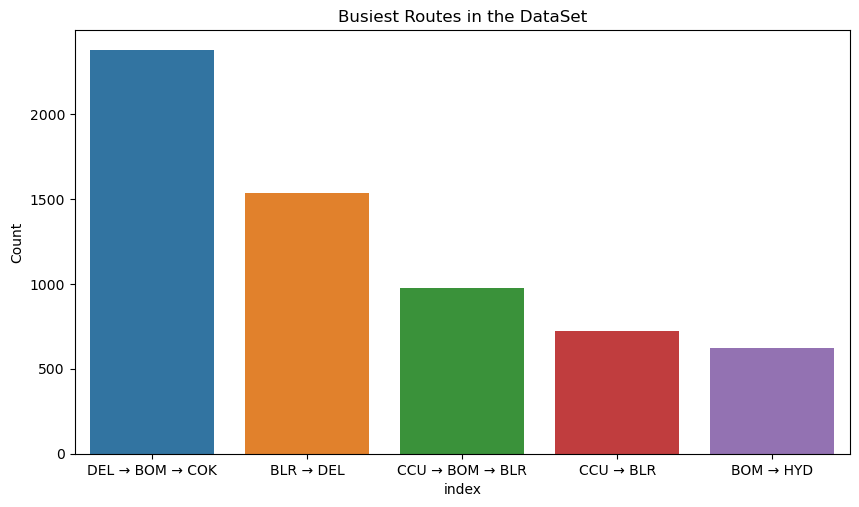

In [32]:
plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_routes.index, y=busy_routes.Route)
plt.title('Busiest Routes in the DataSet')
plt.ylabel('Count')
plt.show()

Delhi to Cochin via Mumbai is the Busiest route with 2376 flights,
Followed by Bangalore to Delhi.

In [33]:
# Route and Total_Stops are related to each other so we are dropping route
#Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so I decided to drop this variable.
train_data.drop(["Route"], axis = 1, inplace = True)

In [34]:

# Checking categorical variables
df_categorical_features = train_data.select_dtypes(include='object')
df_categorical_features.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

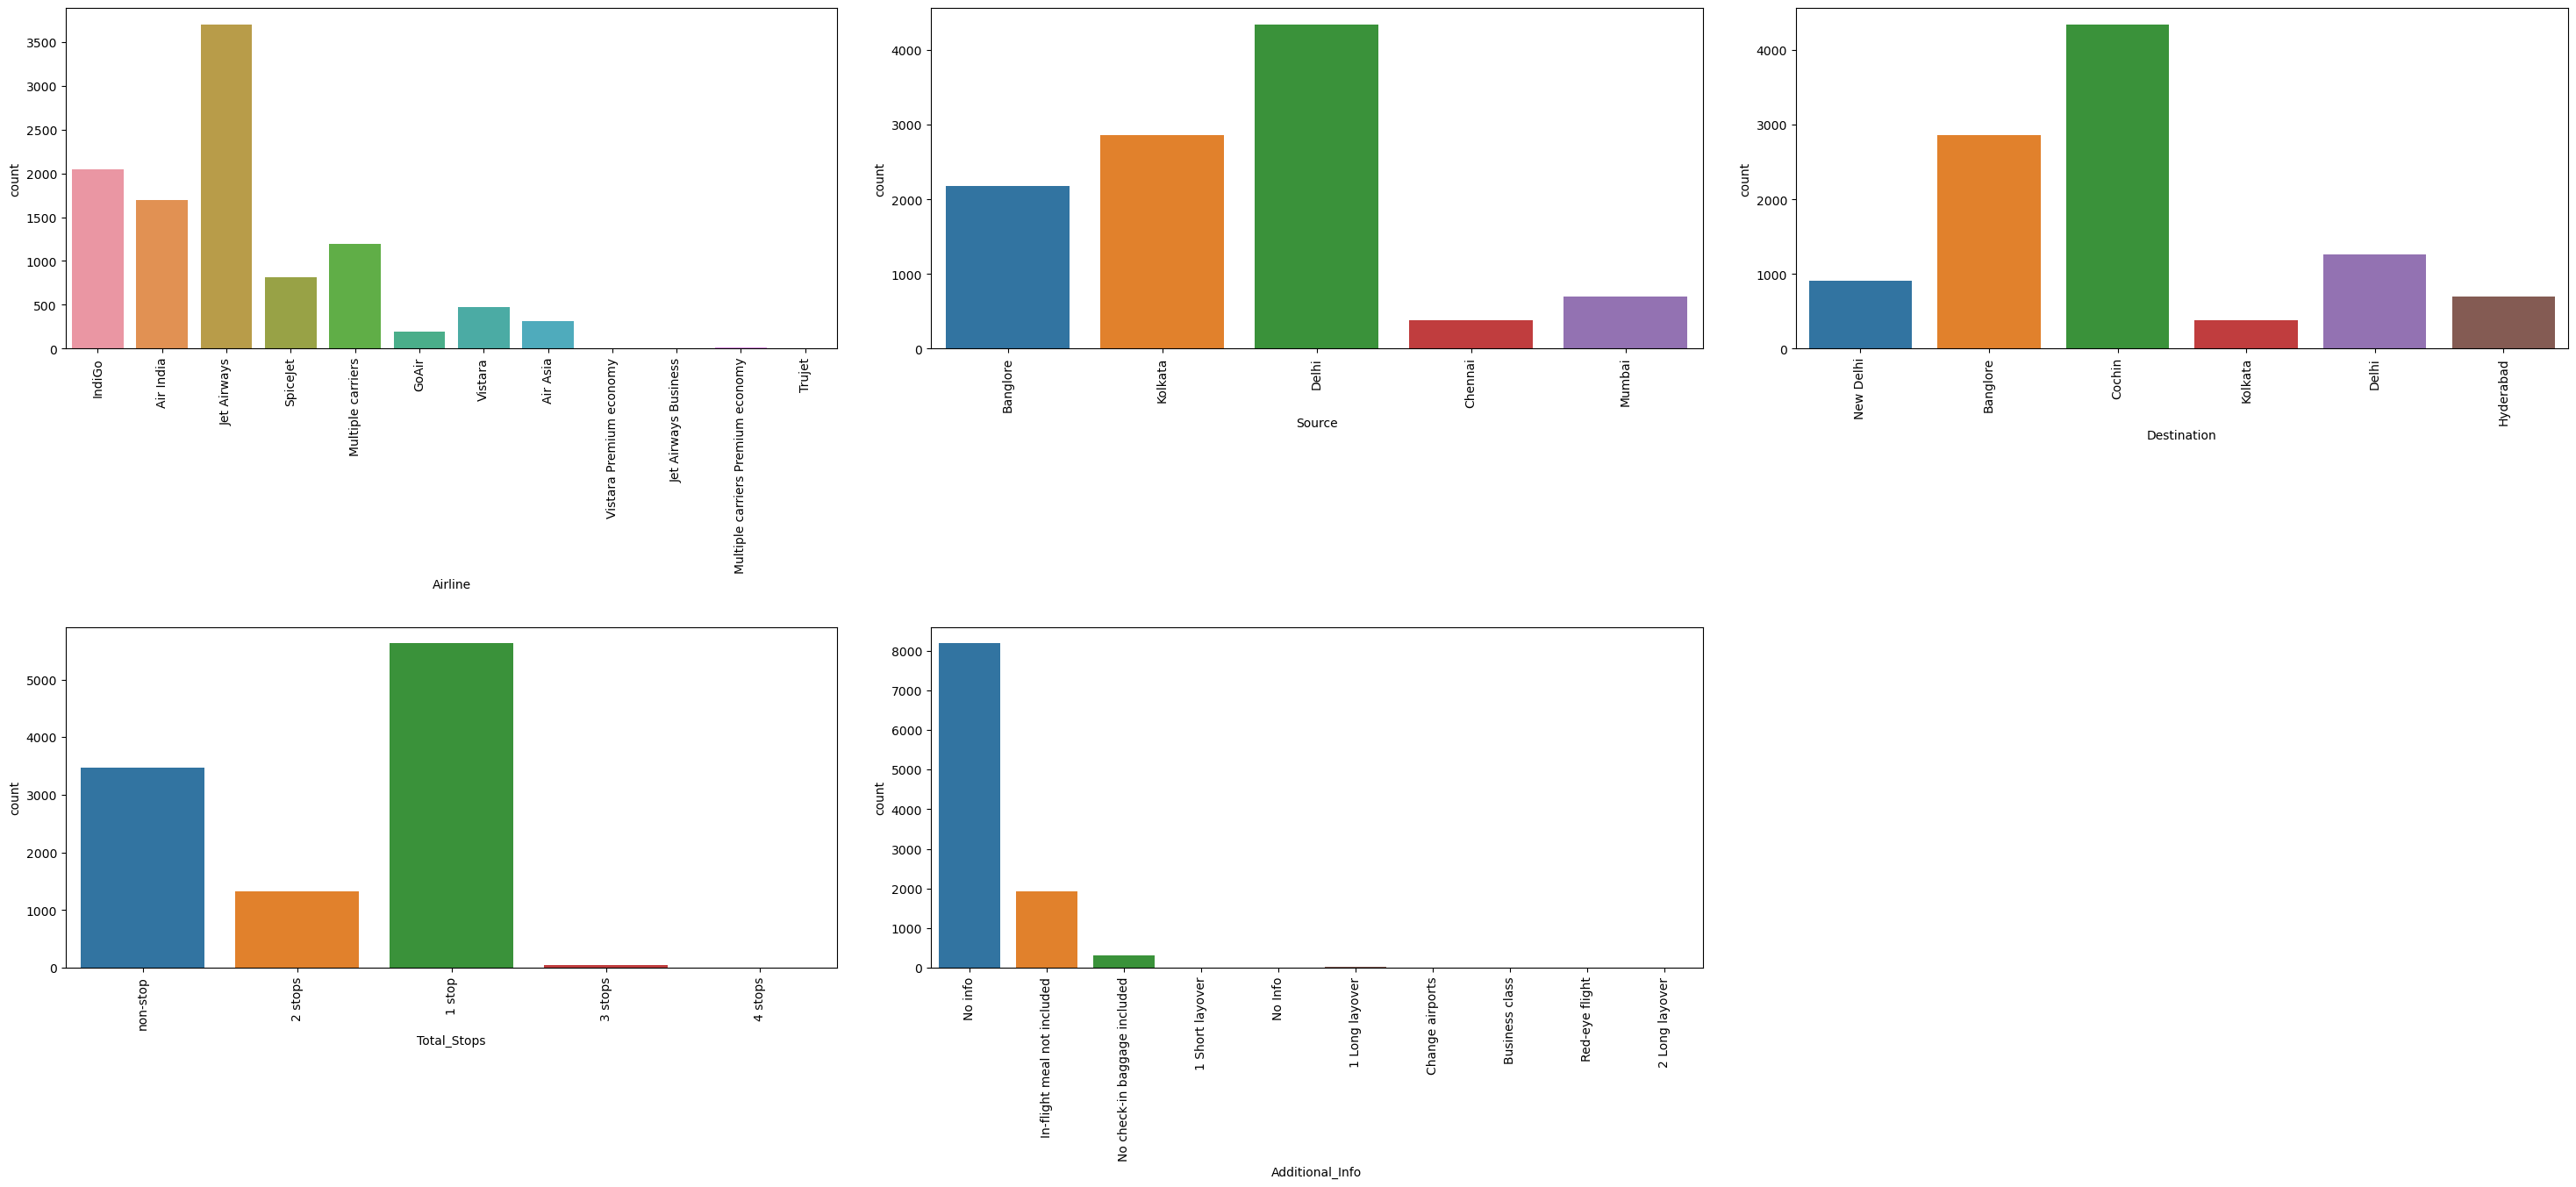

In [35]:
c=1
plt.figure(figsize=(30,40))
for i in df_categorical_features:
  plt.subplot(6,3,c)
  sns.countplot(train_data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

We make the below mentioned observations using the plots above 

**Airlines**

1. Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.
2. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

**Source**

1. Majority of the flights take off from Delhi
2. Chennai has the minimum number of flight take-offs

**Destination**

1. Maximum flights land in Cochin
2. Kolkata has the lowest count of receiving the flights

**Additional Info**

Maximum rows have No info as the value.

**Total stops**

Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

**We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.**

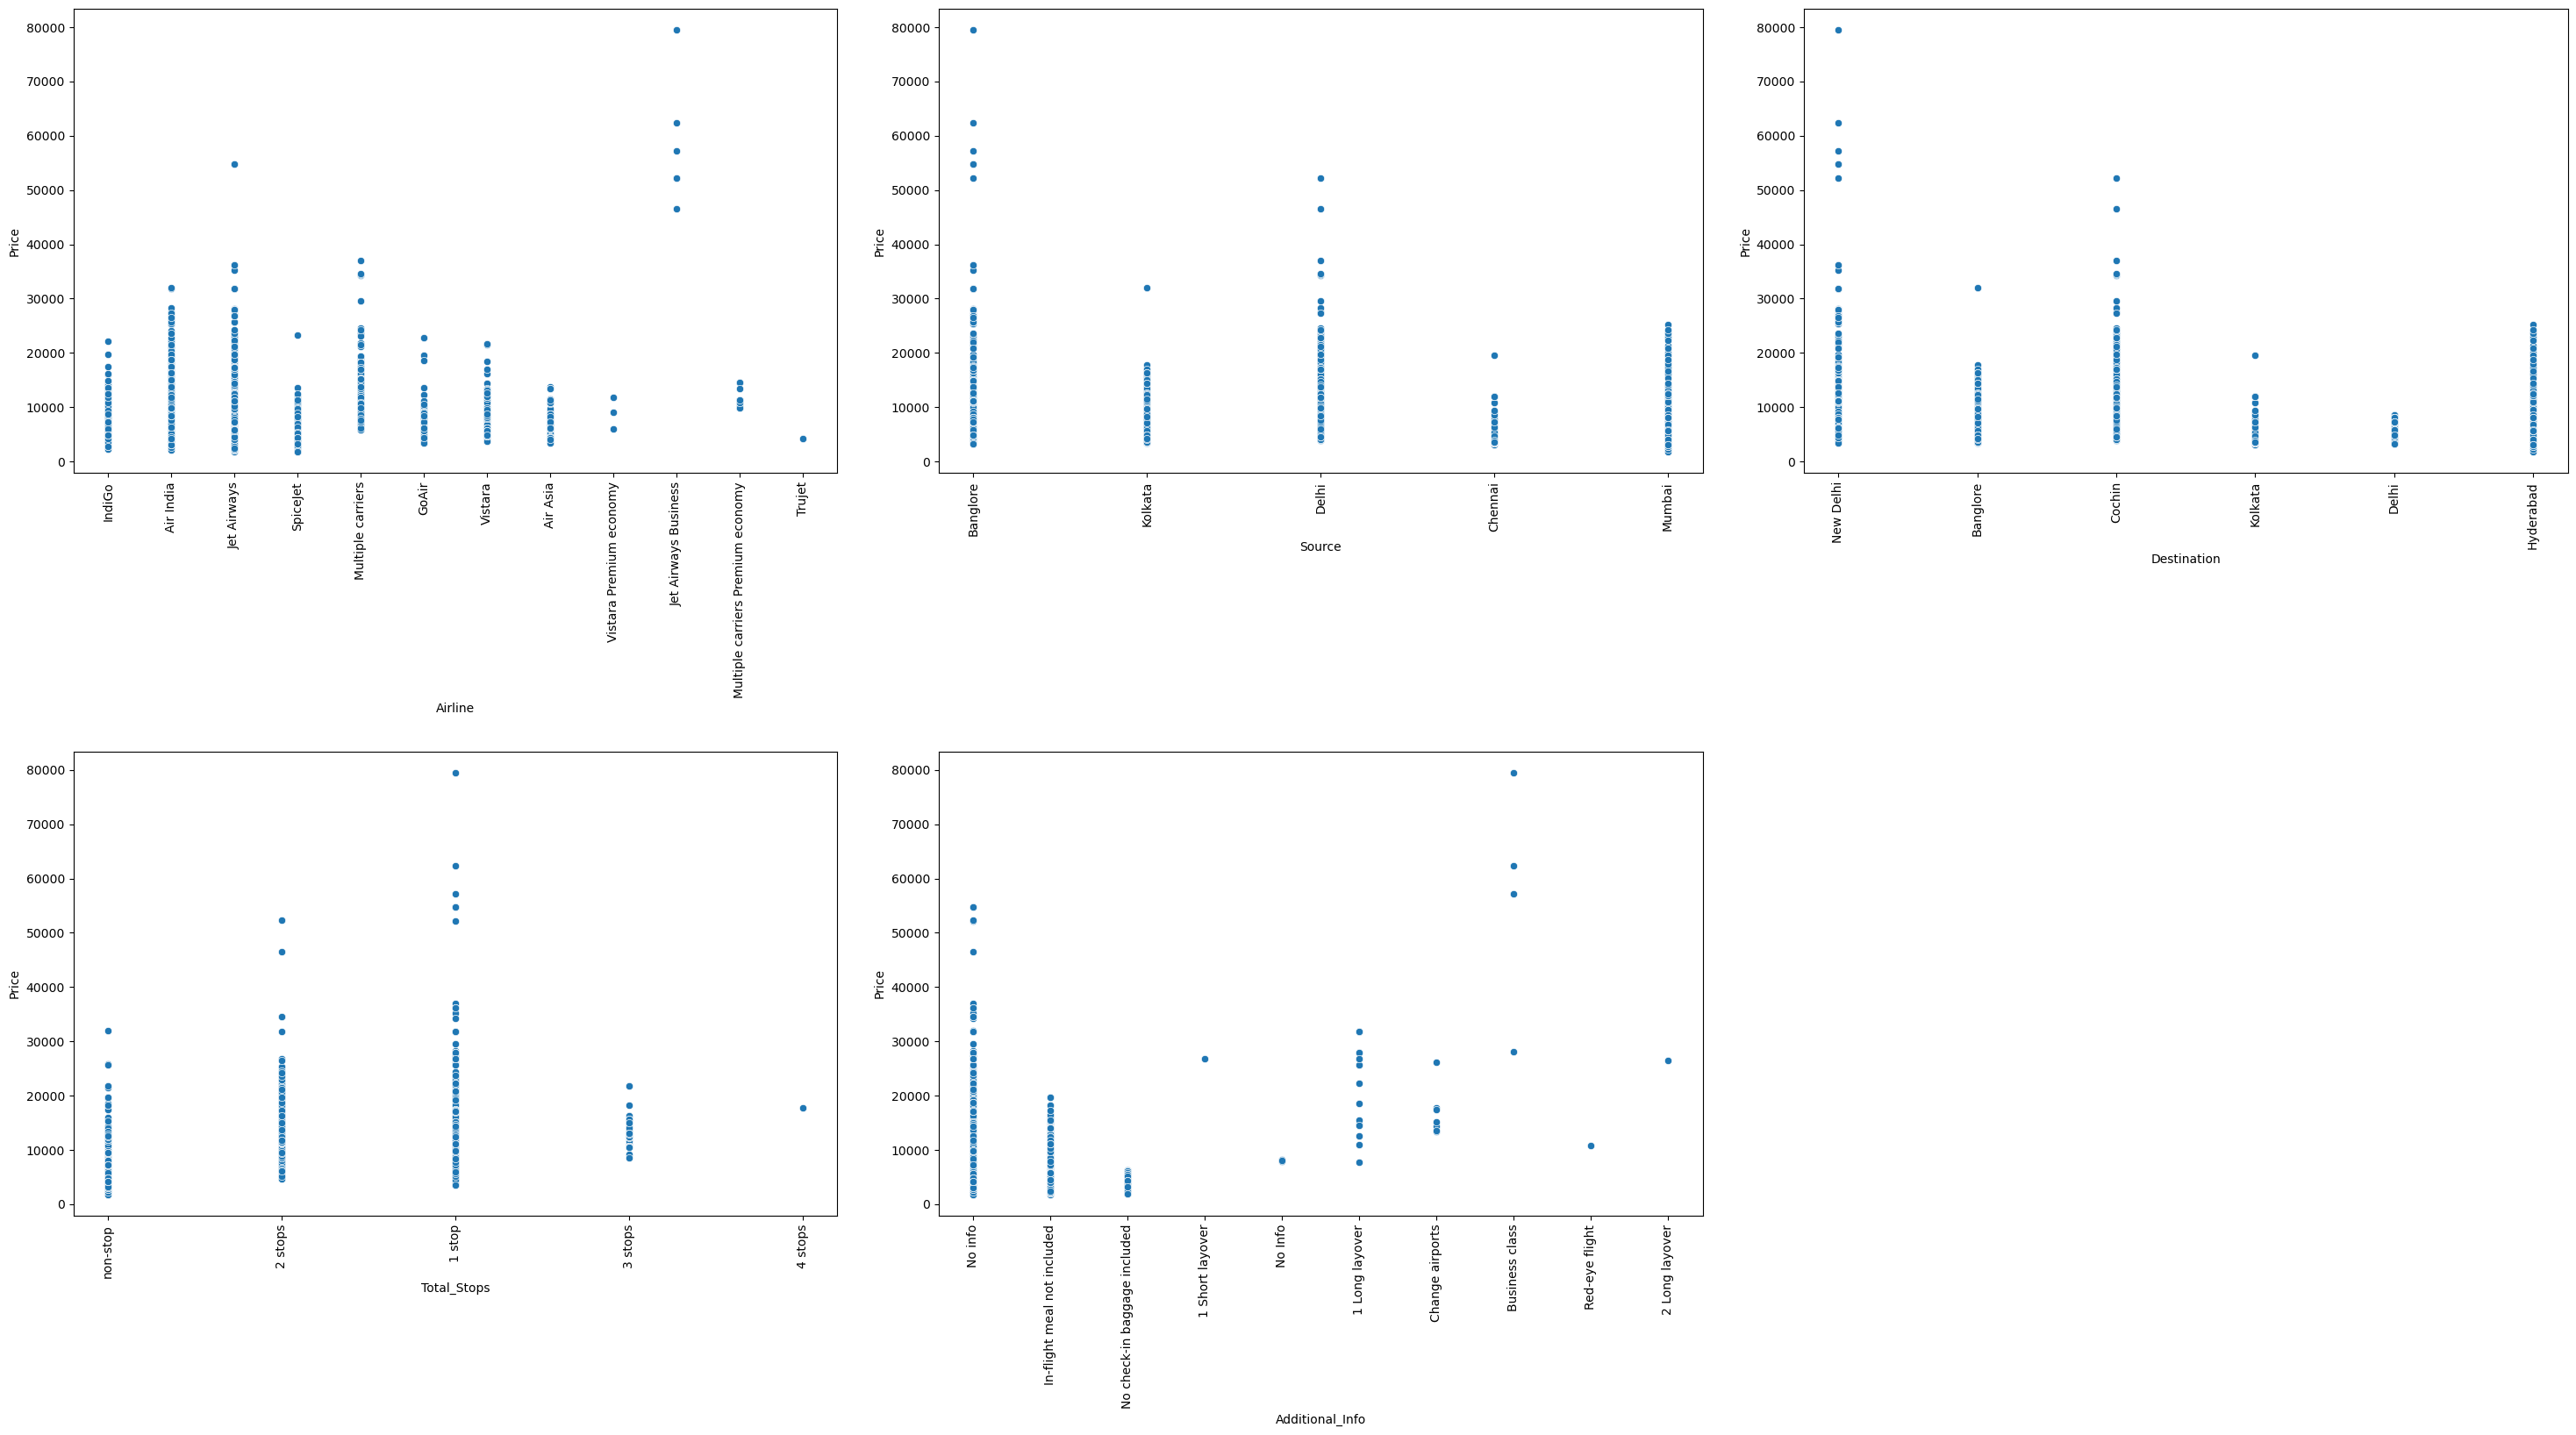

In [36]:
c=1
plt.figure(figsize=(30,40))
for i in df_categorical_features:
  plt.subplot(5,3,c)
  sns.scatterplot(x=train_data[i],y=train_data.Price)
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

We make the following observations from above chart –

- Jet airways business class has the highest prices between 50k — 80k

- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

- If a flight is of business class, its price would be high

- The flights with high prices having 1 stop.



We have quite less data where prices are higher than 50k. We check these rows once –

In [37]:
train_data[train_data.Price>50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,1 stop,No info,52229,1,3,2019,5,45,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,18,40,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,22,50,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512,1,3,2019,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427,1,3,2019,5,45,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,1,3,2019,16,55,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2 stops,No info,52285,6,3,2019,20,5,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209,1,3,2019,9,45,14,25,4,40


We make the below observations –

- We observe that the flights with high prices are 8 in number.

- Majority of the flights belong to Business class

- All the flights have Airlines as Jet airways Business.

- All of these flights took flight in March

In [38]:
# As total stops is a Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [39]:
# More than 80 % of data in additional info is no info so we are dropping it

train_data.drop([ "Additional_Info"], axis = 1, inplace = True)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,21,35,4,45


####5.Treating Missing Values

In [41]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40


In [42]:
# Filtering data with missing value and filling up with appropriate values as determined
train_data.loc[(train_data.Source=='Delhi') & (train_data.Destination=='Cochin') &( (train_data['Month'])==5)& ( (train_data['Duration_hours'])==23)& ( (train_data['Duration_mins'])==40)& (train_data.Airline=='Air India')&(train_data.Price==7480)].sort_values(['Date'])

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40
2554,Air India,Delhi,Cochin,1.0,7480,15,5,2019,9,45,9,25,23,40
1616,Air India,Delhi,Cochin,1.0,7480,24,5,2019,9,45,9,25,23,40


In [43]:
train_data.loc[train_data.Total_Stops.isnull(),'Total_Stops']=1

In [44]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_minutes        0
Arrival_hour       0
Arrival_minutes    0
Duration_hours     0
Duration_mins      0
dtype: int64

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Total_Stops      10463 non-null  float64
 4   Price            10463 non-null  int64  
 5   Date             10463 non-null  int64  
 6   Month            10463 non-null  int64  
 7   Year             10463 non-null  int64  
 8   Dep_hour         10463 non-null  int64  
 9   Dep_minutes      10463 non-null  int64  
 10  Arrival_hour     10463 non-null  int64  
 11  Arrival_minutes  10463 non-null  int64  
 12  Duration_hours   10463 non-null  int64  
 13  Duration_mins    10463 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.2+ MB


####6.Checking the relation of ‘Price’ column with numerical data 

In [46]:
# Checking numeric variables
df_numeric_features = train_data.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

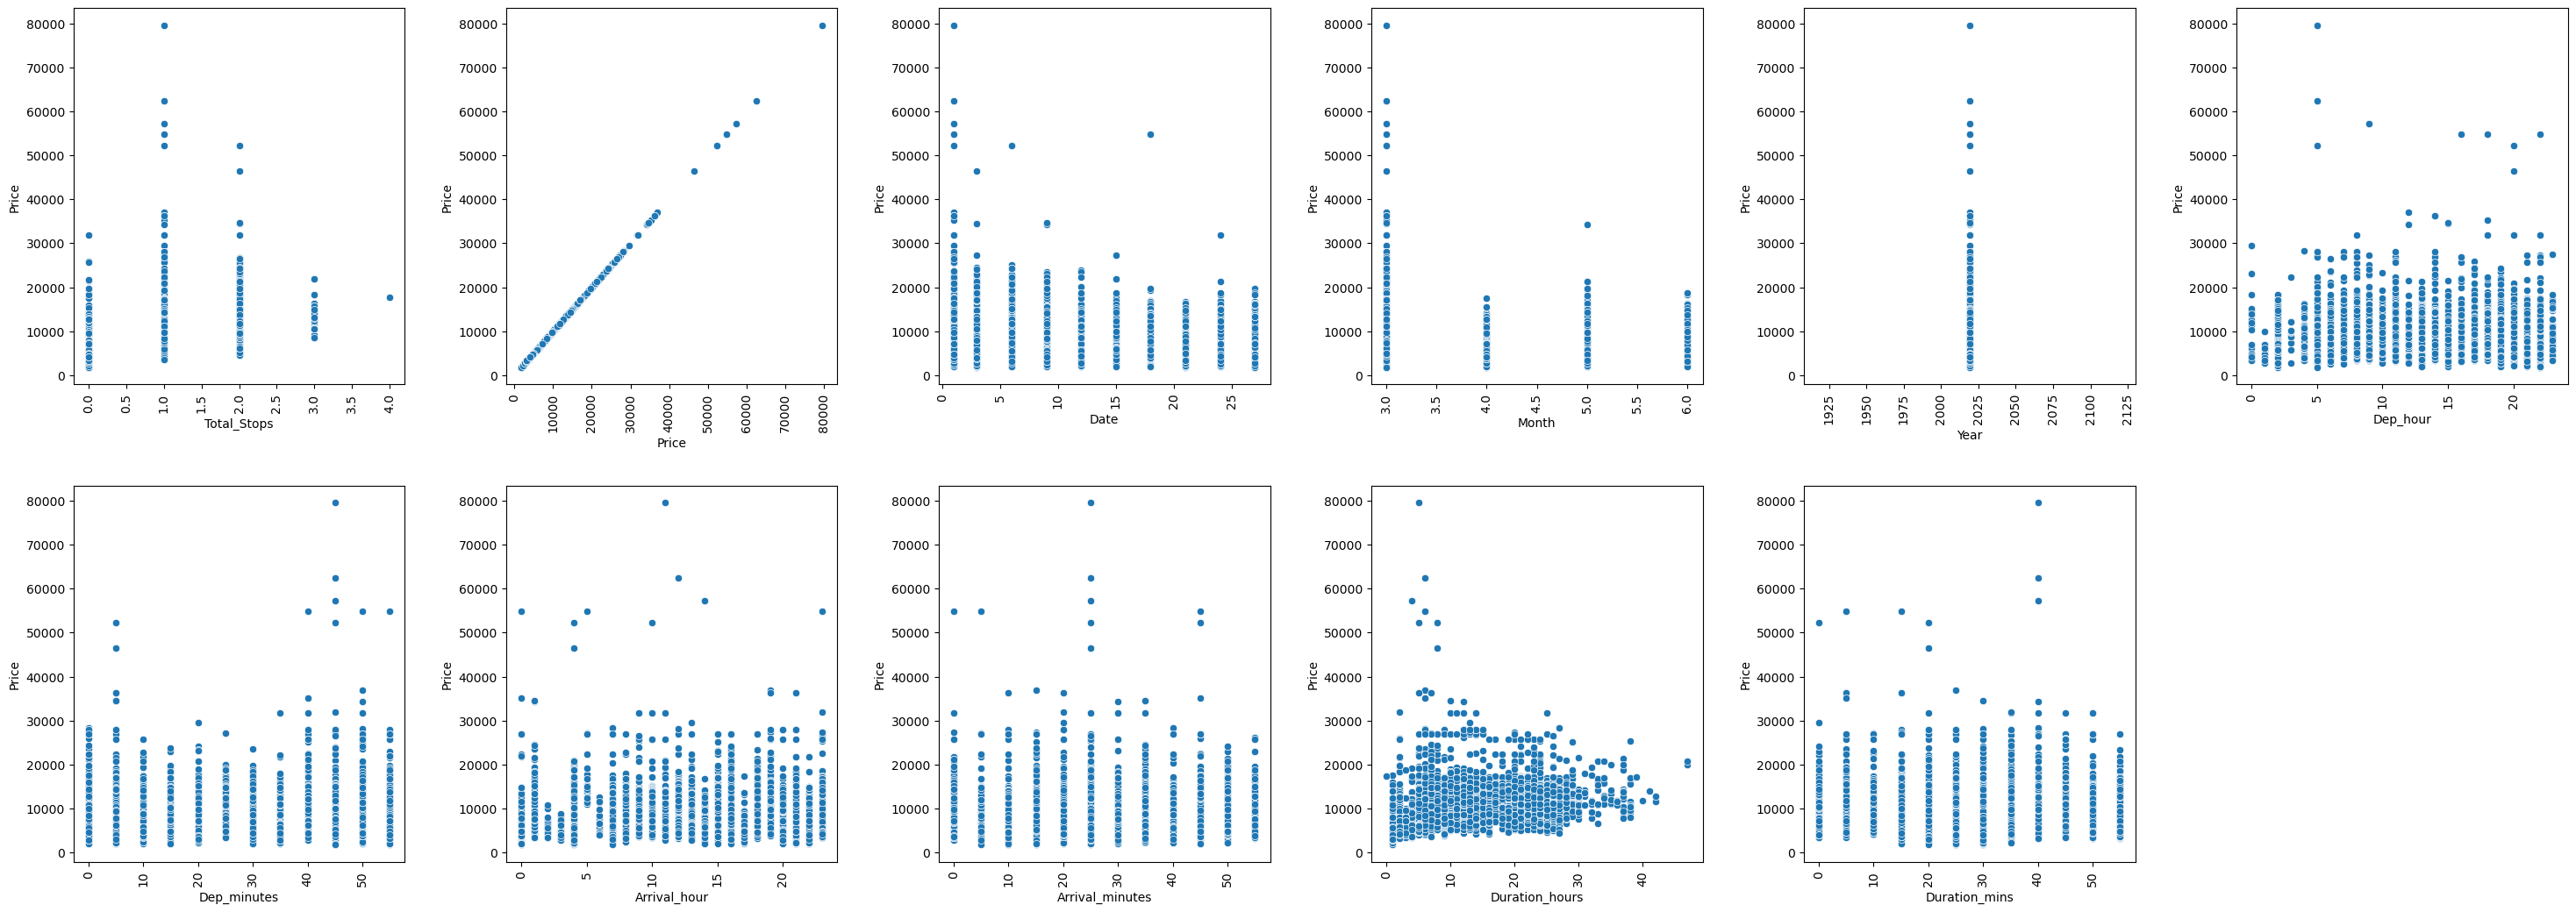

In [47]:
c=1
plt.figure(figsize=(30,65))
for i in df_numeric_features:
  plt.subplot(12,6,c)
  sns.scatterplot(x=train_data[i],y=train_data.Price)
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

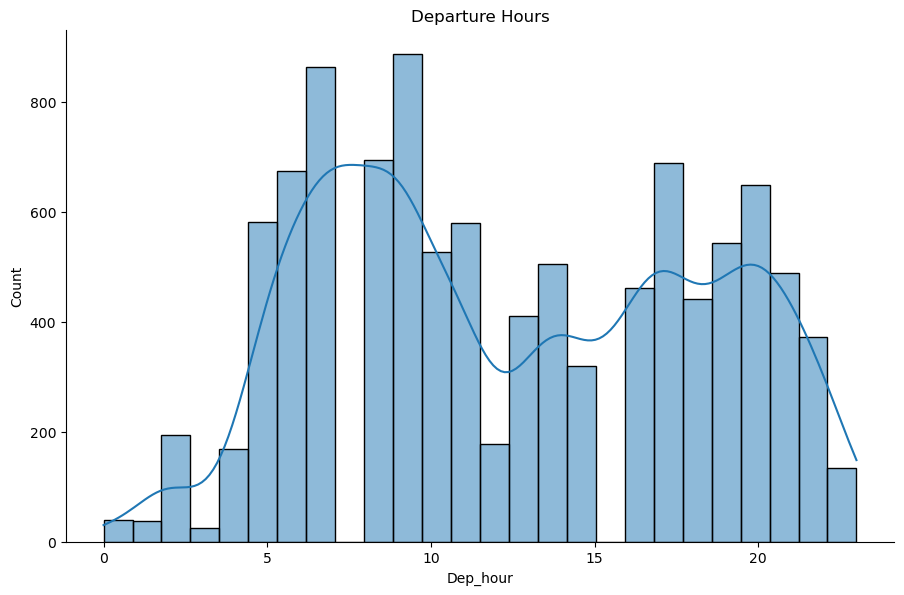

In [48]:
dept_hour = sns.displot(x=train_data['Dep_hour'], data=train_data, kde=True)
plt.title('Departure Hours')
dept_hour.fig.set_figwidth(10)
dept_hour.fig.set_figheight(6)

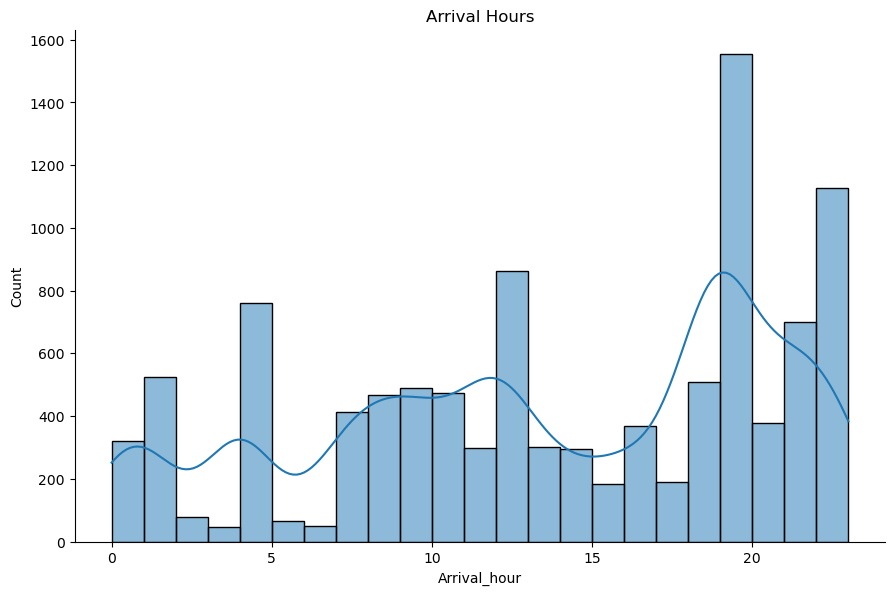

In [49]:
arr_hour = sns.displot(x=train_data['Arrival_hour'], data=train_data, kde=True)
plt.title('Arrival Hours')
arr_hour.fig.set_figwidth(10)
arr_hour.fig.set_figheight(6)

We observe that –

- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)

- High price flights are lesser during end of month

- Prices are higher in the month of March

- Prices are high if flight is departing in the morning and evening.

- Prices are high if arrival time is in the afternoon 

- With increase in travel hours, price decreases

- Most Flight depart during morning hours

- Most Flight arrive in the evening hours

####7. Checking Outliers

In [50]:
train_data.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
count,10463.000000,10463.000000,10463.000000,10463.00000,10463.0,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,0.802351,9026.642454,13.462487,4.70152,2019.0,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,0.660580,4624.653227,8.467403,1.16375,0.0,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,1759.000000,1.000000,3.00000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,6.000000,3.00000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,12.000000,5.00000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12343.500000,21.000000,6.00000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.00000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Total_Stops'),
  Text(1, 0, 'Price'),
  Text(2, 0, 'Date'),
  Text(3, 0, 'Month'),
  Text(4, 0, 'Year'),
  Text(5, 0, 'Dep_hour'),
  Text(6, 0, 'Dep_minutes'),
  Text(7, 0, 'Arrival_hour'),
  Text(8, 0, 'Arrival_minutes'),
  Text(9, 0, 'Duration_hours'),
  Text(10, 0, 'Duration_mins')])

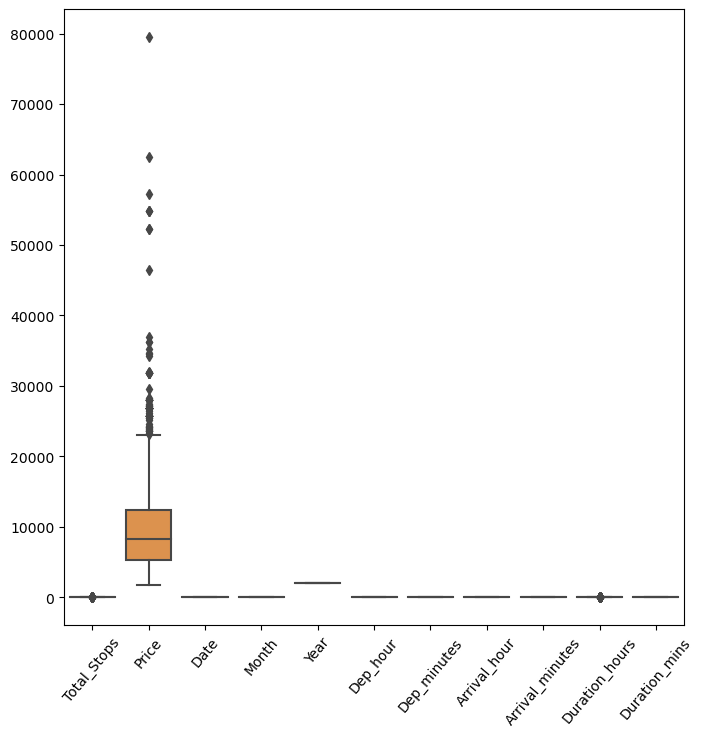

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train_data)
plt.xticks(rotation=50)

We make the below conclusions from the above boxplot graph –

- Outliers are present in Duration hours, Total stops and price

- We will not remove outliers from total stops since price is impacted by number of stops

- Duration hours also show a relationship with target column so we are not removing it's outliers

- High Priced Ticket such as that of a business class. These prices aren’t removed as this extreme value is a legitimate observation.


In [52]:
train_data[(train_data['Duration_hours']<1) & (train_data['Duration_mins']<15)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
6474,Air India,Mumbai,Hyderabad,2.0,17327,6,3,2019,16,50,16,55,0,5


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from mumbai to hyderabad with 2 stops in 5 min. So we are dropping this column.

In [53]:
train_data.drop(index=6474,inplace=True,axis=0)

####8. Skewness Treatment

In [54]:
train_data.Duration_hours=np.log(train_data.Duration_hours)

We need to treat skewness for ‘Duration_hours’ column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

In [55]:
train_data.Duration_hours.skew()

-0.24515715084875292

In [56]:
train_data.skew()

Total_Stops        0.332328
Price              1.858373
Date               0.124628
Month             -0.377839
Year               0.000000
Dep_hour           0.108613
Dep_minutes        0.171278
Arrival_hour      -0.378701
Arrival_minutes    0.110791
Duration_hours    -0.245157
Duration_mins     -0.086201
dtype: float64

####9. Assumption of Linear Regression

#####Linearity

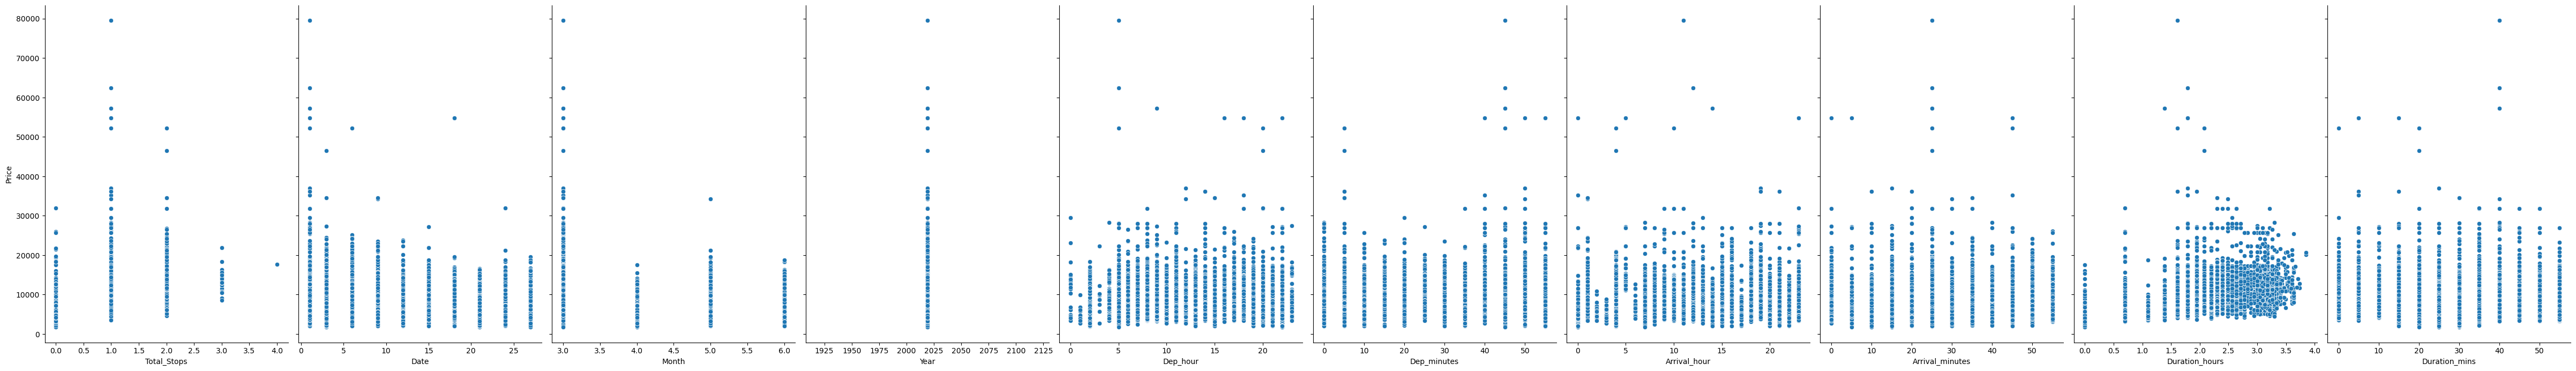

In [57]:
 # visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(train_data, x_vars=['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour','Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours','Duration_mins'], y_vars='Price', size=7, aspect=0.7)

By looking at the above plots  we can observe that there is no linear relationship between dependent and independent Variable

#####Checking Correlation



In [58]:
vcorr=train_data.corr()

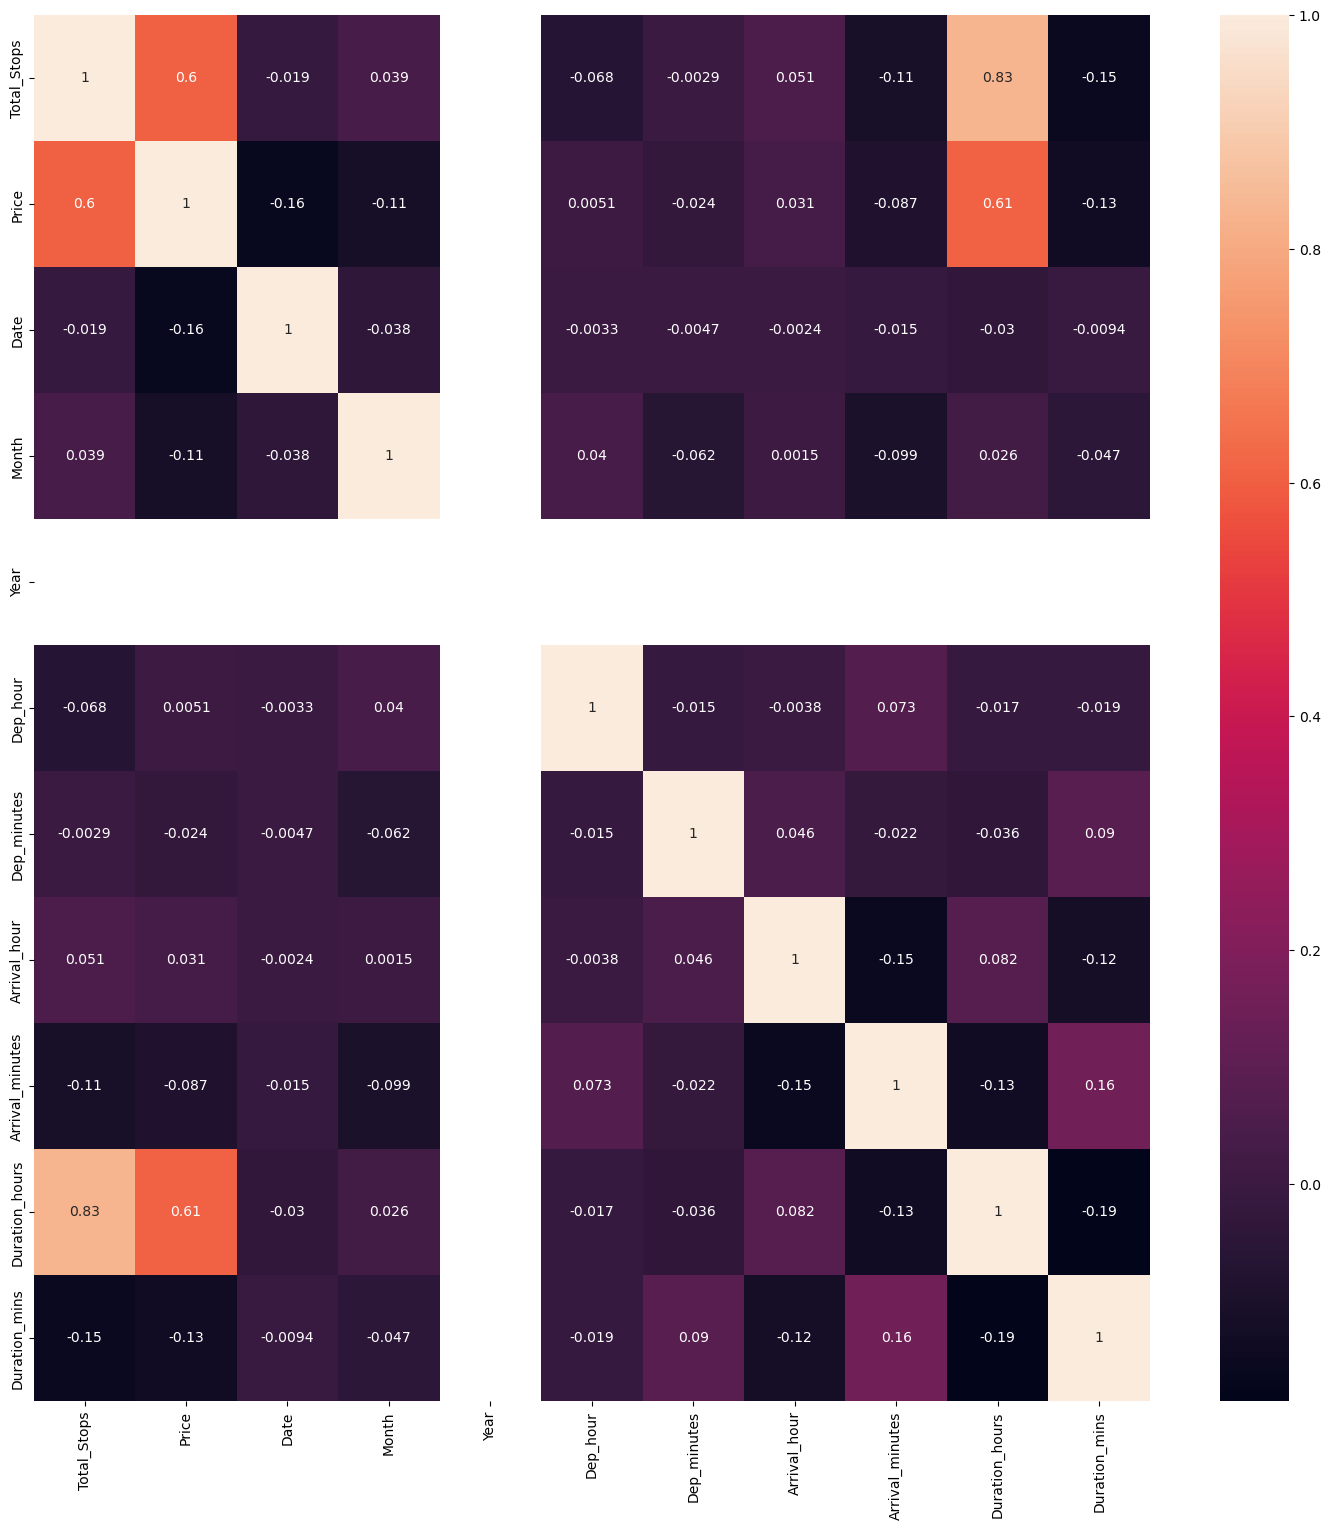

In [59]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(vcorr,annot=True)
plt.show()

In [60]:
#We can see there is correlation between duration_hour and total stops, we will do feature selection later in order to find which is the important variable, price and total stops are also correlated.

#####Test for Normality

In [61]:
from scipy import stats
# extract the price column as a numpy array
prices = train_data['Price'].values

# perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(prices)

# interpret test results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


Since the data is not gaussian, so we can understand that parametric model like linear regression won't give good accuracy with it. 

####10.Dummy Encoding for rest of categorical columns

The rest 3 object columns are nominal columns so we are applying one hot encoding so as to convert it into number column

In [62]:
data_train=train_data.copy()


In [63]:
train_data=pd.get_dummies(train_data,drop_first=True)

In [64]:
train_data.shape

(10462, 31)

In [65]:
train_data.head()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,22,20,1,10,0.693147,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,2019,5,50,13,15,1.945910,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,2019,9,25,4,25,2.944439,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,2019,18,5,23,30,1.609438,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,2019,16,50,21,35,1.386294,...,0,0,0,0,0,0,0,0,0,1


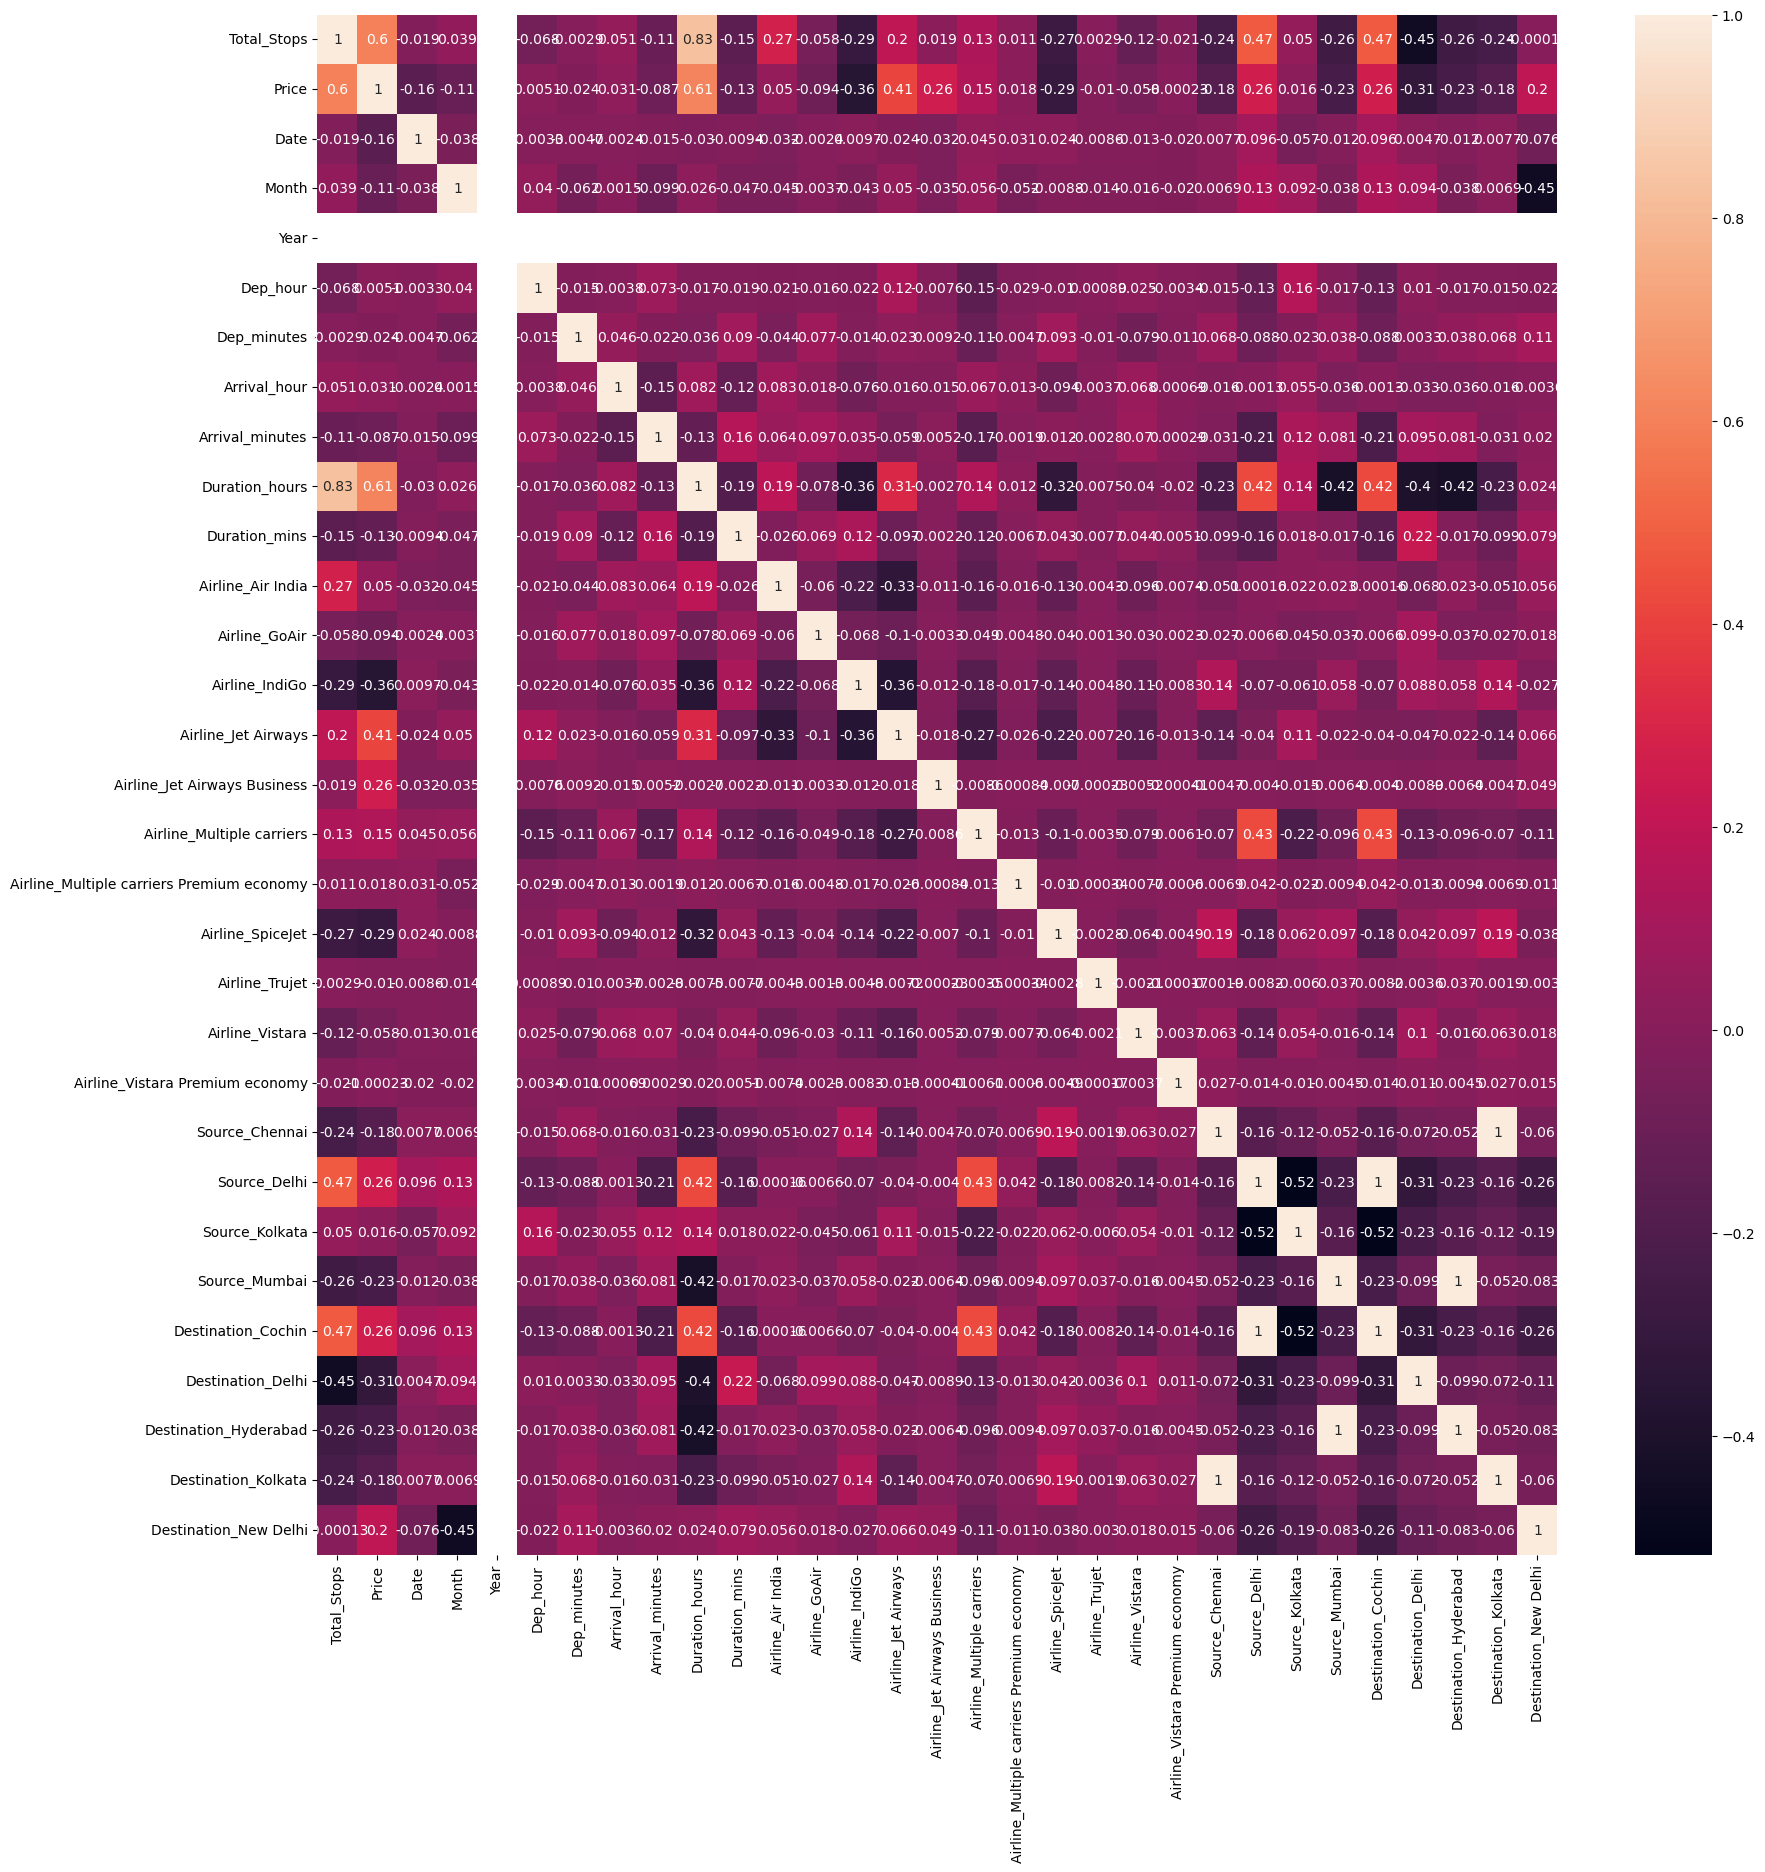

In [66]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

---

###2. Test set

In [67]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [68]:
# Preprocessing as in train data


print(test_data.info())
print()

#treating null values
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Datey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Year"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minutes"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minutes"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())


print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())


print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())


# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

data_test=pd.get_dummies(test_data,drop_first=True)

print("Shape of test data : ", data_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
-------------------------------------------------------------------------

In [69]:
data_test.head()

,Total_Stops,Datey,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,5,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,5,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [70]:
data_test.shape

(2671, 29)

In [71]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   Datey                                      2671 non-null   int64
 2   Month                                      2671 non-null   int64
 3   Year                                       2671 non-null   int64
 4   Dep_hour                                   2671 non-null   int64
 5   Dep_minutes                                2671 non-null   int64
 6   Arrival_hour                               2671 non-null   int64
 7   Arrival_minutes                            2671 non-null   int64
 8   Duration_hours                             2671 non-null   int64
 9   Duration_mins                              2671 non-null   int64
 10  Airline_Air India                          2671 

---

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10462 non-null  float64
 1   Price                                      10462 non-null  int64  
 2   Date                                       10462 non-null  int64  
 3   Month                                      10462 non-null  int64  
 4   Year                                       10462 non-null  int64  
 5   Dep_hour                                   10462 non-null  int64  
 6   Dep_minutes                                10462 non-null  int64  
 7   Arrival_hour                               10462 non-null  int64  
 8   Arrival_minutes                            10462 non-null  int64  
 9   Duration_hours                             10462 non-null  float64
 10  Duration_mins         

##4. Feature Selection

In [73]:
train_data.shape

(10462, 31)

In [74]:
train_data.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [75]:
X=train_data.drop(['Price'],axis=1)
X.head()

,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2019,22,20,1,10,0.693147,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,2019,5,50,13,15,1.945910,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,2019,9,25,4,25,2.944439,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,2019,18,5,23,30,1.609438,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,2019,16,50,21,35,1.386294,45,...,0,0,0,0,0,0,0,0,0,1


In [76]:
y = train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [77]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [78]:
print(selection.feature_importances_)

[1.77981686e-01 1.44767075e-01 5.22585863e-02 0.00000000e+00
 2.41667645e-02 2.16552310e-02 2.74712102e-02 1.89576751e-02
 1.94574073e-01 1.74509202e-02 9.85829397e-03 2.19590327e-03
 1.73748241e-02 1.25326353e-01 6.88676849e-02 1.87178887e-02
 8.67351123e-04 3.00055796e-03 6.17372743e-05 4.67503718e-03
 6.89069646e-05 4.67758535e-04 5.93536580e-03 3.32313368e-03
 5.55592906e-03 1.15917585e-02 1.18716932e-02 4.93636459e-03
 4.77676399e-04 2.55425592e-02]


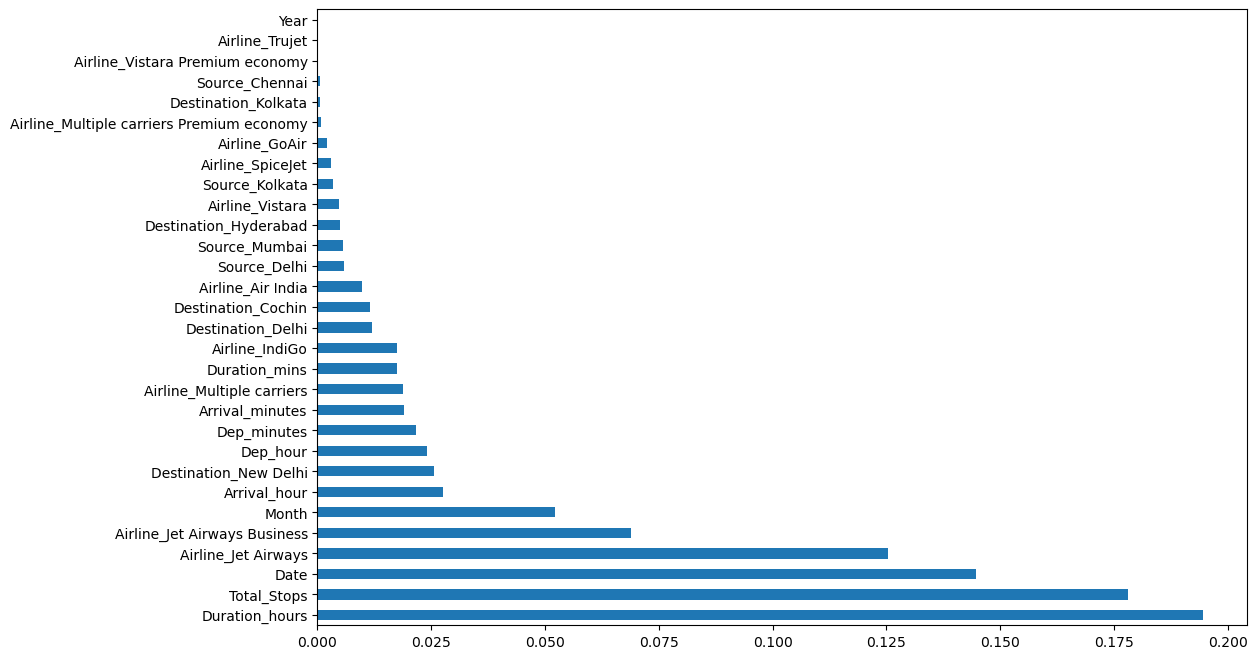

In [79]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(31).plot(kind='barh')
plt.show()

In [80]:
feat_importances.index

Index(['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour', 'Dep_minutes',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

I used the 14 most important features for model building

##5. Model Building

###1.Splitting the data into train and test data set

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X[feat_importances.nlargest(14).index],y,test_size=0.20,random_state=1)

In [82]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8369, 14), (2093, 14), (8369,), (2093,))

###2.Scaling the data

In [83]:
sc=StandardScaler()

In [84]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

###3.Model Application

In [96]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [99]:

for i in range(3):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()

LinearRegression(): 
MSE_train:  8317291.297502333
MSE_test:  8195449.112079216
RMSE_train:  2883.9714453340785
RMSE_test:  2862.769482874794
R2_score_train:  0.611798255849376
R2_score_test:  0.613471902126874

DecisionTreeRegressor(): 
MSE_train:  673345.01104672
MSE_test:  6743104.644136009
RMSE_train:  820.5760239287521
RMSE_test:  2596.7488604283644
R2_score_train:  0.9685722552747487
R2_score_test:  0.6819699108355417

RandomForestRegressor(): 
MSE_train:  1043784.670318655
MSE_test:  4502098.654982622
RMSE_train:  1021.6578049027253
RMSE_test:  2121.814943623176
R2_score_train:  0.951282332788192
R2_score_test:  0.7876641529037449



Random Forest had the best accuracy based on training and test dataset

###4.Hypertuning the model

In [87]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [88]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, verbose=2)

In [90]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [91]:
#predicting the values
pred=rf_model.predict(X_test_scaled)

r2_score(y_test,pred)

0.8125350804082273

In [92]:
y_pred_train=rf_model.predict(X_train_scaled)

In [93]:
from sklearn.metrics import mean_absolute_error
print('r2 score train', r2_score)
print('r2_score test:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score train <function r2_score at 0x000001D7F09161F0>
r2_score test: 0.8125350804082273
MAE: 1197.0386227462288
MSE: 3974767.2090805927
RMSE: 1993.681822428191


After hypertuning,the accuracy of random forest increases .